## **Import Required Libraries**

In [312]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report,f1_score,precision_score,accuracy_score,recall_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore", category=FutureWarning)

## **Load the Datasets**

In [209]:
train_data=pd.read_csv("C:\\UOC pdf\\4th Year\\Machine Learning-02\\Data-Analysis-Project-2\\data\\train_data.csv")
test_data=pd.read_csv("C:\\UOC pdf\\4th Year\\Machine Learning-02\\Data-Analysis-Project-2\\data\\test_data.csv")

In [210]:
train_data=train_data.drop(columns=["Unnamed: 0"],axis=1)
test_data=test_data.drop(columns=["Unnamed: 0"],axis=1)

## **Split X_train,Y_train and X_test,Y_test**

In [211]:
X_train=train_data.drop(columns=["diagnosis"],axis=1)
Y_train=train_data["diagnosis"]
X_test=test_data.drop(columns=["diagnosis"],axis=1)
Y_test=test_data["diagnosis"]

In [212]:
print(f"Shape of the Training set:{X_train.shape,Y_train.shape}")
print(f"Shape of  the Testing set:{X_test.shape,Y_test.shape}")

Shape of the Training set:((700, 15), (700,))
Shape of  the Testing set:((300, 15), (300,))


## **Build the Pipeline**

In [213]:
num_cols=X_train.select_dtypes(include="number").columns  ##get the all numerical column names
cat_cols=X_train.select_dtypes(include=["object","category"]).columns ##get the all categorical column names

In [214]:
nominal_cols=["gender","pem_present","meditation_or_mindfulness"] ##nominal columns
ordinal_cols=["work_status","social_activity_level","exercise_frequency"] ##ordinal columns

#### **Define the Pipeline**

In [215]:
numerical_pipeline=Pipeline(steps=[
    ("Scale",StandardScaler())                ##Numberical varaibles pipeline
])
ordinal_pipeline=Pipeline(steps=[
    ("Ordinal Encoder",OrdinalEncoder())      ##Ordinal variable pipeline
])
nominal_pieline=Pipeline(steps=[
    ("Nominal Encoder",OneHotEncoder(sparse_output=False,handle_unknown="ignore"))  ##Nominal variable pipeline
])

#### **Combine Pipelines**

In [216]:
Transfomers=ColumnTransformer(transformers=[
    ("Numerical Pipeline",numerical_pipeline,num_cols), ##Combine the Numerical Pipeline with Numeical Columns
    ("Ordinal Pipeline",ordinal_pipeline,ordinal_cols), ##Combine the Ordinal Pipeline with Ordinal Columns
    ("Nominal Pipeline",nominal_pieline,nominal_cols)   ##Combine the Nominal Pipeline with Nominal Columns
],
   n_jobs=-1,
   verbose=True,
   remainder="drop"
)

#### **End Pipeline**

In [217]:
final_pipeline=Pipeline(steps=[
    ("Preprocessing",Transfomers),  ##Preprocessing Step
    ("Resampling SMOTE",SMOTE(random_state=42)),  ##SMOTE Resampling Method
    ("Support Vector Classifier",SVC(kernel="rbf",C=0.1,random_state=42,gamma="scale")) ##Apply SVC
])

#### **Execute Pipeline**

In [218]:
final_pipeline.fit(X_train,Y_train)  ## Execute the Final Pipeline

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('Numerical Pipeline',
                                                  Pipeline(steps=[('Scale',
                                                                   StandardScaler())]),
                                                  Index(['age', 'sleep_quality_index', 'brain_fog_level', 'physical_pain_score',
       'stress_level', 'depression_phq9_score', 'fatigue_severity_scale_score',
       'pem_duration_hours', 'hours_of_sleep_per_night'],
      dtype='object')...
                                                                   OrdinalEncoder())]),
                                                  ['work_status',
                                                   'social_activity_level',
                                                   'exercise_frequency']),
                                                 ('Nominal Pipeline',
                                                  Pipeline(steps=[('Nominal '
                                                                   'Encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['gender', 'pem_present',
                                                   'meditation_or_mindfulness'])],
                                   verbose=True)),
                ('Resampling SMOTE', SMOTE(random_state=42)),
                ('Support Vector Classifier', SVC(C=0.1, random_state=42))])

## **Model Evaluation**

In [219]:
Y_pred=final_pipeline.predict(X_test) ##get the prediction values

In [220]:
report_svc=classification_report(Y_test,Y_pred) ##get the classification report for predictions

In [221]:
Y_pred_train=final_pipeline.predict(X_train) ##get the preidction value for training set

In [222]:
report_svc_train=classification_report(Y_train,Y_pred_train) ##get the classification report for training 

#### **Get the Evaluation Metrics for Testing Data**

In [223]:
f1_test=f1_score(Y_test,Y_pred,average='weighted') ##F1 score for testing data
precision_test=precision_score(Y_test,Y_pred,average="weighted") ##precision for testing data
accuracy_test=accuracy_score(Y_test,Y_pred) ## accuracy score for testing data
recall_test=recall_score(Y_test,Y_pred,average="weighted") ## recall score for testing data

In [224]:
# Print results
print(f"Accuracy:  {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"F1 Score:  {f1_test:.4f}")
print(f"Recall Score: {recall_test:.4f}")

Accuracy:  0.9267
Precision: 0.9379
F1 Score:  0.9203
Recall Score: 0.9267


#### **Get the Evaluation Metrics for Traning Data**

In [225]:
f1_train=f1_score(Y_train,Y_pred_train,average="weighted") ##F1 score for training data
precision_train=precision_score(Y_train,Y_pred_train,average="weighted") ## precision score for training data
accuracy_train=accuracy_score(Y_train,Y_pred_train) ## accuracy score for training data
recall_train=recall_score(Y_train,Y_pred_train,average="weighted") ##recall score for training data

In [226]:
# Print results
print(f"Accuracy:  {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"F1 Score:  {f1_train:.4f}")
print(f"Recall Score:{recall_train:.4f}")

Accuracy:  0.9171
Precision: 0.9286
F1 Score:  0.9116
Recall Score:0.9171


In [227]:
### print the classification report for testing data
print(report_svc)

              precision    recall  f1-score   support

        Both       1.00      0.59      0.74        54
  Depression       1.00      1.00      1.00       125
      ME/CFS       0.85      1.00      0.92       121

    accuracy                           0.93       300
   macro avg       0.95      0.86      0.89       300
weighted avg       0.94      0.93      0.92       300



In [228]:
## print the classification report for training data
print(report_svc_train)

              precision    recall  f1-score   support

        Both       0.98      0.62      0.76       148
  Depression       1.00      1.00      1.00       276
      ME/CFS       0.83      0.99      0.90       276

    accuracy                           0.92       700
   macro avg       0.94      0.87      0.89       700
weighted avg       0.93      0.92      0.91       700



## **Hyperparameter Tune using GridsearchCV**

In [229]:
param_grid = {
    'Support Vector Classifier__C': [0.001,0.01, 1, 10], ##variaous cost parameters
    'Support Vector Classifier__kernel': ['linear', 'rbf'], ##define kernels
    'Support Vector Classifier__gamma': [0.001, 0.01, 0.1, 1, 10]  # relevant for 'rbf' kernel
}

In [230]:
grid_search=GridSearchCV(final_pipeline,param_grid=param_grid,cv=5,scoring="f1_weighted")

#### **Execute the Pipeline**

In [231]:
grid_search.fit(X_train,Y_train) ##execute the whole pipeline

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocessing',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('Numerical '
                                                                         'Pipeline',
                                                                         Pipeline(steps=[('Scale',
                                                                                          StandardScaler())]),
                                                                         Index(['age', 'sleep_quality_index', 'brain_fog_level', 'physical_pain_score',
       'stress_level', 'depression_phq9_score', 'fatigue_severity_scale_score',
       'pem_duration_hours', 'hours_of_sle...
                                                                         ['gender',
                                                                          'pem_present',
                                                                          'meditation_or_mindfulness'])],
                                                          verbose=True)),
                                       ('Resampling SMOTE',
                                        SMOTE(random_state=42)),
                                       ('Support Vector Classifier',
                                        SVC(C=0.1, random_state=42))]),
             param_grid={'Support Vector Classifier__C': [0.001, 0.01, 1, 10],
                         'Support Vector Classifier__gamma': [0.001, 0.01, 0.1,
                                                              1, 10],
                         'Support Vector Classifier__kernel': ['linear',
                                                               'rbf']},
             scoring='f1_weighted')

#### **Best Model**

In [232]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'Support Vector Classifier__C': 10, 'Support Vector Classifier__gamma': 0.001, 'Support Vector Classifier__kernel': 'linear'}


In [233]:
best_model=grid_search.best_estimator_

In [234]:
best_model

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('Numerical Pipeline',
                                                  Pipeline(steps=[('Scale',
                                                                   StandardScaler())]),
                                                  Index(['age', 'sleep_quality_index', 'brain_fog_level', 'physical_pain_score',
       'stress_level', 'depression_phq9_score', 'fatigue_severity_scale_score',
       'pem_duration_hours', 'hours_of_sleep_per_night'],
      dtype='object')...
                                                   'social_activity_level',
                                                   'exercise_frequency']),
                                                 ('Nominal Pipeline',
                                                  Pipeline(steps=[('Nominal '
                                                                   'Encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['gender', 'pem_present',
                                                   'meditation_or_mindfulness'])],
                                   verbose=True)),
                ('Resampling SMOTE', SMOTE(random_state=42)),
                ('Support Vector Classifier',
                 SVC(C=10, gamma=0.001, kernel='linear', random_state=42))])

## **Model Evaluation**

In [235]:
Y_pred_cv=best_model.predict(X_test) ##get the prediction values

In [236]:
report_svc_cv=classification_report(Y_test,Y_pred_cv) ##get the classification report for predictions

In [237]:
Y_pred_train_cv=best_model.predict(X_train) ##get the preidction value for training set

In [238]:
report_svc_train_cv=classification_report(Y_train,Y_pred_train_cv) ##get the classification report for training 

#### **Get the Evaluation Metrics for Testing Data**

In [239]:
f1_test=f1_score(Y_test,Y_pred_cv,average='weighted') ##F1 score for testing data
precision_test=precision_score(Y_test,Y_pred_cv,average="weighted") ##precision for testing data
accuracy_test=accuracy_score(Y_test,Y_pred_cv) ## accuracy score for testing data
recall_test=recall_score(Y_test,Y_pred_cv,average="weighted") ## recall score for testing data

In [240]:
# Print results
print(f"Accuracy:  {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"F1 Score:  {f1_test:.4f}")
print(f"Recall Score: {recall_test:.4f}")

Accuracy:  0.9967
Precision: 0.9967
F1 Score:  0.9967
Recall Score: 0.9967


#### **Get the Evaluation Metrics for Training Data**

In [241]:
f1_train=f1_score(Y_train,Y_pred_train_cv,average="weighted") ##F1 score for training data
precision_train=precision_score(Y_train,Y_pred_train_cv,average="weighted") ## precision score for training data
accuracy_train=accuracy_score(Y_train,Y_pred_train_cv) ## accuracy score for training data
recall_train=recall_score(Y_train,Y_pred_train_cv,average="weighted") ##recall score for training data

In [242]:
# Print results
print(f"Accuracy:  {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"F1 Score:  {f1_train:.4f}")
print(f"Recall Score:{recall_train:.4f}")

Accuracy:  0.9886
Precision: 0.9889
F1 Score:  0.9886
Recall Score:0.9886


In [243]:
### print the classification report for testing data
print(report_svc_cv)

              precision    recall  f1-score   support

        Both       0.98      1.00      0.99        54
  Depression       1.00      1.00      1.00       125
      ME/CFS       1.00      0.99      1.00       121

    accuracy                           1.00       300
   macro avg       0.99      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [244]:
## print the classification report for training data
print(report_svc_train_cv)

              precision    recall  f1-score   support

        Both       0.95      0.99      0.97       148
  Depression       1.00      1.00      1.00       276
      ME/CFS       1.00      0.97      0.99       276

    accuracy                           0.99       700
   macro avg       0.98      0.99      0.99       700
weighted avg       0.99      0.99      0.99       700



## **Hyperparameter Tune using Optuna**

#### **Import Required Libraries**

In [245]:
import optuna
from sklearn.model_selection import cross_val_score

#### **Define the Objective Function**

In [246]:
def objective(trials):
    ##define parameters 
    C=trials.suggest_float("C",0.1,100,log=True)
    kernel=trials.suggest_categorical("kernel",["linear","rbf","poly"])
    gamma=trials.suggest_categorical("gamma",[0.001, 0.01, 0.1, 1, 10])

    ##Build the pipeline
    pipeline_optuna=Pipeline(steps=[
        ("Preprocessing",Transfomers),
        ("Resampling SMOTE",SMOTE(random_state=42)),
        ("Support Vector Classifier",SVC(random_state=42,C=C,gamma=gamma,kernel=kernel))
    ])

    ##cross validation score
    score=cross_val_score(pipeline_optuna,X_train,Y_train,cv=5,scoring="f1_weighted")
    return score.mean()

#### **Run the Optimizer**

In [247]:
study=optuna.create_study(
    study_name="svc_model"
    ,direction="maximize")
study.optimize(objective,n_trials=50) 

[I 2025-07-25 23:31:42,317] A new study created in memory with name: svc_model
[I 2025-07-25 23:31:42,609] Trial 0 finished with value: 0.8814719450188667 and parameters: {'C': 0.8660644898672197, 'kernel': 'poly', 'gamma': 0.1}. Best is trial 0 with value: 0.8814719450188667.
[I 2025-07-25 23:31:42,915] Trial 1 finished with value: 0.5133584941844993 and parameters: {'C': 24.90711561188488, 'kernel': 'rbf', 'gamma': 1}. Best is trial 0 with value: 0.8814719450188667.
[I 2025-07-25 23:31:43,136] Trial 2 finished with value: 0.9168994549279708 and parameters: {'C': 0.16766776742453898, 'kernel': 'linear', 'gamma': 0.01}. Best is trial 2 with value: 0.9168994549279708.
[I 2025-07-25 23:31:43,403] Trial 3 finished with value: 0.8962983407481563 and parameters: {'C': 0.6275721153221676, 'kernel': 'rbf', 'gamma': 0.1}. Best is trial 2 with value: 0.9168994549279708.
[I 2025-07-25 23:31:43,655] Trial 4 finished with value: 0.674973345107354 and parameters: {'C': 0.8900657814742379, 'kernel':

#### **Best Model**

In [248]:
best_model_optuna=study.best_params
print(f"Best Params:{best_model_optuna}")

Best Params:{'C': 82.41434477563455, 'kernel': 'linear', 'gamma': 0.001}


#### **Rebuild the Pipeline with Best Parameters**

In [249]:
best_pipeline=Pipeline(steps=[
        ("Preprocessing",Transfomers),
        ("Resampling SMOTE",SMOTE(random_state=42)),
        ("Support Vector Classifier",SVC(random_state=42,**best_model_optuna))
    ])

#### **Train the Model with Best Parameters**

In [250]:
best_pipeline.fit(X_train,Y_train)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('Numerical Pipeline',
                                                  Pipeline(steps=[('Scale',
                                                                   StandardScaler())]),
                                                  Index(['age', 'sleep_quality_index', 'brain_fog_level', 'physical_pain_score',
       'stress_level', 'depression_phq9_score', 'fatigue_severity_scale_score',
       'pem_duration_hours', 'hours_of_sleep_per_night'],
      dtype='object')...
                                                   'exercise_frequency']),
                                                 ('Nominal Pipeline',
                                                  Pipeline(steps=[('Nominal '
                                                                   'Encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['gender', 'pem_present',
                                                   'meditation_or_mindfulness'])],
                                   verbose=True)),
                ('Resampling SMOTE', SMOTE(random_state=42)),
                ('Support Vector Classifier',
                 SVC(C=82.41434477563455, gamma=0.001, kernel='linear',
                     random_state=42))])

#### **Evaluate the Model**

In [251]:
Y_pred_optuna=best_pipeline.predict(X_test) ##get the prediction values

In [252]:
report_svc_optuna=classification_report(Y_test,Y_pred_optuna) ##get the classification report for predictions

In [253]:
Y_pred_train_optuna=best_pipeline.predict(X_train) ##get the preidction value for training set

In [254]:
report_svc_train_optuna=classification_report(Y_train,Y_pred_train_optuna) ##get the classification report for training 

#### **Get the Evaluation Metrics for Testing Data**

In [255]:
f1_test=f1_score(Y_test,Y_pred_optuna,average='weighted') ##F1 score for testing data
precision_test=precision_score(Y_test,Y_pred_optuna,average="weighted") ##precision for testing data
accuracy_test=accuracy_score(Y_test,Y_pred_optuna) ## accuracy score for testing data
recall_test=recall_score(Y_test,Y_pred_optuna,average="weighted") ## recall score for testing data

In [256]:
# Print results
print(f"Accuracy:  {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"F1 Score:  {f1_test:.4f}")
print(f"Recall Score:{recall_test:.4f}")

Accuracy:  0.9967
Precision: 0.9967
F1 Score:  0.9967
Recall Score:0.9967


#### **Get the Evaluation Metrics for Training Data**

In [257]:
f1_train=f1_score(Y_train,Y_pred_train_optuna,average="weighted") ##F1 score for training data
precision_train=precision_score(Y_train,Y_pred_train_optuna,average="weighted") ## precision score for training data
accuracy_train=accuracy_score(Y_train,Y_pred_train_optuna) ## accuracy score for training data
recall_train=recall_score(Y_train,Y_pred_train_optuna,average="weighted") ##recall score for training data

In [258]:
# Print results
print(f"Accuracy:  {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"F1 Score:  {f1_train:.4f}")
print(f"Recall Score:{recall_train:.4f}")

Accuracy:  0.9886
Precision: 0.9889
F1 Score:  0.9886
Recall Score:0.9886


## **Model Deployment using Mlflow**

In [259]:
import mlflow

In [260]:
import mlflow.sklearn
import mlflow.sklearn


mlflow.set_tracking_uri("http://127.0.0.1:5000/")
mlflow.set_experiment("Support--Vector--Classifier")

with mlflow.start_run(run_name="Support Vector Classifier"):
    ##Before Hyperparameter Tune
    params={
        "kernel":"rbf",
        "C":0.1,
        "gamma":"scale"
        # "kernel":"linear",  ## Uncomment this line if you want to use linear kernel
    }
    mlflow.log_params(params)
    metrics_1={
        "accuracy":accuracy_score(Y_test,Y_pred),
        "f1-score":f1_score(Y_test,Y_pred,average='weighted'),
        "precision":precision_score(Y_test,Y_pred,average="weighted") ,
        "recall":recall_score(Y_test,Y_pred,average="weighted")
    }
    for key,value in metrics_1.items():
        mlflow.log_metric(key,value)
    
    mlflow.sklearn.log_model(final_pipeline,"Support Vector Classifier")
    #############################################################################
    
with mlflow.start_run(run_name="Support Vector Classifier with Grid SearchCV"):
    ### After Grid Search CV
    mlflow.log_params(best_parameters)
    metrics_2={
      "accuracy":accuracy_score(Y_test,Y_pred_cv),
      "f1-score":f1_score(Y_test,Y_pred_cv,average='weighted'),
      "precision":precision_score(Y_test,Y_pred_cv,average="weighted"),
      "recall":recall_score(Y_test,Y_pred_cv,average="weighted") 
    }
    
    for key,value in metrics_2.items():
        mlflow.log_metric(key,value)

    mlflow.sklearn.log_model(best_model,"Support Vector Classifier with Grid SearchCV")
    #######################################################################################

with mlflow.start_run(run_name="Support Vector Classifier with Optuna"):
    ## After Optuna result
    mlflow.log_params(best_model_optuna)
    metrics_3={
        "accuracy":accuracy_score(Y_test,Y_pred_optuna),
        "f1-score":f1_score(Y_test,Y_pred_optuna,average='weighted'),
        "precision":precision_score(Y_test,Y_pred_optuna,average="weighted"),
        "recall":recall_score(Y_test,Y_pred_optuna,average="weighted")
    }

    for key, value in metrics_3.items():
        mlflow.log_metric(key, value)
    mlflow.sklearn.log_model(best_pipeline,"Support Vector Classifier with Optuna")

2025/07/25 23:31:55 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/25 23:32:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Support Vector Classifier at: http://127.0.0.1:5000/#/experiments/112265069379202797/runs/4c7a6f205bd444358a1defa23baa9c4c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/112265069379202797


2025/07/25 23:32:00 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/25 23:32:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/07/25 23:32:05 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🏃 View run Support Vector Classifier with Grid SearchCV at: http://127.0.0.1:5000/#/experiments/112265069379202797/runs/1845616148774bbbb9f8c0827fc26790
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/112265069379202797


2025/07/25 23:32:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Support Vector Classifier with Optuna at: http://127.0.0.1:5000/#/experiments/112265069379202797/runs/e261c62ab6834eed98006395deb5372c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/112265069379202797


#### **Register the Model**

In [261]:
model_name="Support Vector Classifier with Grid SearchCV"
run_id=input("Enter the Model Run ID:")
model_uri=f"runs:/{run_id}/{model_name}"

with mlflow.start_run(run_id=run_id):
    mlflow.register_model(model_uri=model_uri,name=model_name)

Registered model 'Support Vector Classifier with Grid SearchCV' already exists. Creating a new version of this model...
2025/07/25 23:32:49 WARNING mlflow.tracking._model_registry.fluent: Run with id 1845616148774bbbb9f8c0827fc26790 has no artifacts at artifact path 'Support Vector Classifier with Grid SearchCV', registering model based on models:/m-59c077a4441247ecaba843ddebd04561 instead
2025/07/25 23:32:49 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Support Vector Classifier with Grid SearchCV, version 4
Created version '4' of model 'Support Vector Classifier with Grid SearchCV'.


🏃 View run Support Vector Classifier with Grid SearchCV at: http://127.0.0.1:5000/#/experiments/112265069379202797/runs/1845616148774bbbb9f8c0827fc26790
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/112265069379202797


## **Trust Model**

### **XAI Techniques(SHAP)**

#### **Import Required Libraries**

In [262]:
import shap

In [263]:
#### Exctract the SVC model from the pipeline
svc_model=best_model.named_steps["Support Vector Classifier"]

##Extract the preprocess data from the pipeline
X_train_encode=best_model.named_steps["Preprocessing"].fit_transform(X_train)
X_test_encode=best_model.named_steps["Preprocessing"].transform(X_test)

In [264]:
####################################################################################
ordinal_cols=best_model.named_steps["Preprocessing"].named_transformers_["Ordinal Pipeline"].get_feature_names_out(ordinal_cols)
nominal_cols=best_model.named_steps["Preprocessing"].named_transformers_["Nominal Pipeline"].get_feature_names_out(nominal_cols)
feature_names=np.concatenate([num_cols,ordinal_cols,nominal_cols])

In [265]:
X_train_encode=pd.DataFrame(X_train_encode,columns=feature_names)
X_test_encode=pd.DataFrame(X_test_encode,columns=feature_names)

#### **Define the SHAP objective**

In [266]:
explainer=shap.LinearExplainer(svc_model,X_train_encode,feature_perturbation="interventional") #define SHAP objective

#### **Identifying the Classes**

In [267]:
print(svc_model.classes_)
## 0 with Both,1 with Depresssion and 2 with ME/CFS

['Both' 'Depression' 'ME/CFS']


#### **Get the SHAP values**

In [268]:
shape_values=explainer(X_test_encode) ##get the SHAPE values
print(np.shape(shape_values))  ##shape of the SHAP values

(300, 18, 3)


In [273]:
predict=svc_model.predict(X_test_encode)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [274]:
# Define mapping
label_map = {'Both': 0, 'Depression': 1, 'ME/CFS': 2}
predict_series = pd.Series(predict)
predict = predict_series.map(label_map).values

In [275]:
new_shape_values=[]
for i,pred in enumerate(predict):
    ##get the values for predicted class
    new_shape_values.append(shape_values.values[i][:,pred])

##replce the shap values
shape_values.values=np.array(new_shape_values)
print(shape_values.shape)

(300, 18)


#### **Feature Importance Plot**

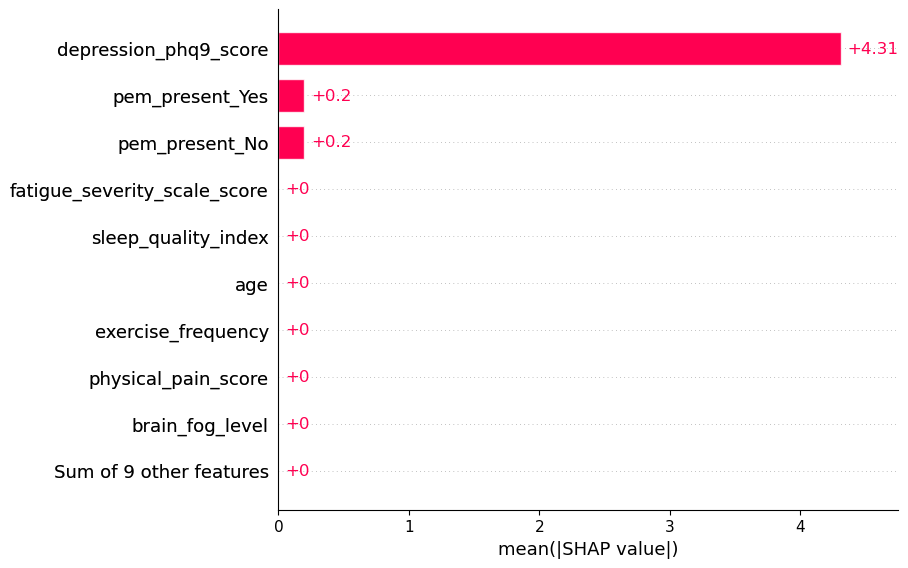

In [276]:
shap.plots.bar(shape_values) ##average contribution for the predicted class

#### **Most Critical Variables for prediction Depression Score and and Pem Present**

#### **Beeswarm Plot**

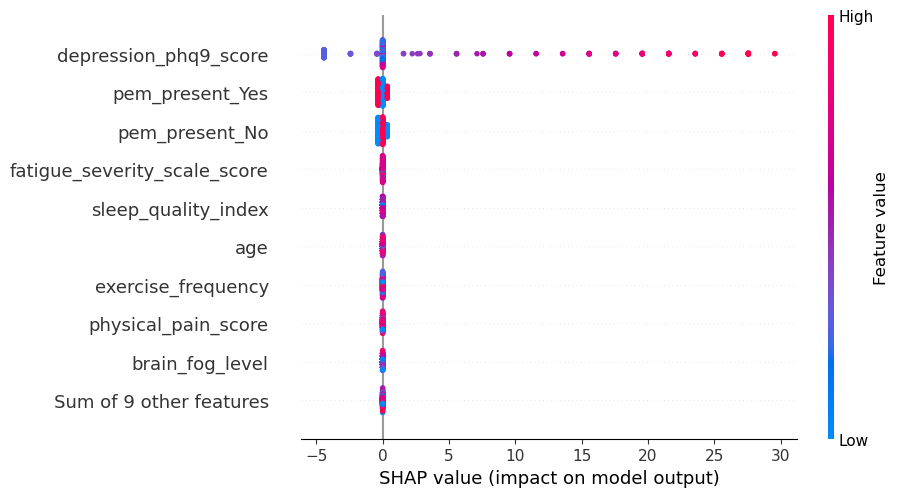

In [277]:
shap.plots.beeswarm(shape_values)

In [306]:
##Get the SHAP values for 'depression_phq9_score'
feature_name = 'depression_phq9_score'
feature_index = X_test_encode.columns.get_loc(feature_name)
depression_shap_values = shape_values.values[:, feature_index]

In [311]:
##Build a DataFrame for visualization
df_shap = pd.DataFrame({
    'SHAP Value': depression_shap_values,
    'Target Class': Y_test,
    'Feature Value': X_test_encode[feature_name].values
})

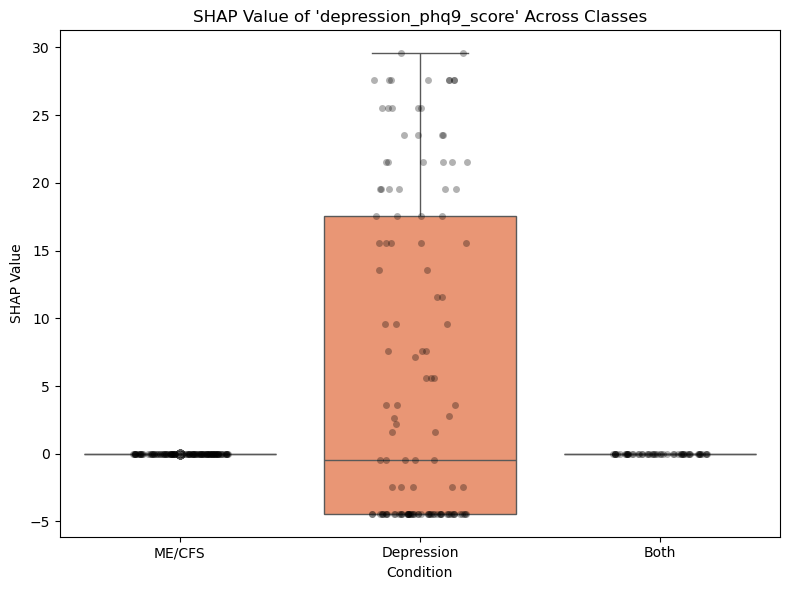

In [315]:
##Plot (you can try stripplot, boxplot or violin)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_shap, x='Target Class', y='SHAP Value', palette='Set2')
sns.stripplot(data=df_shap, x='Target Class', y='SHAP Value', color='black', alpha=0.3, jitter=0.2)

plt.title(f"SHAP Value of '{feature_name}' Across Classes")
plt.xlabel("Condition")
plt.ylabel("SHAP Value")
plt.tight_layout()
plt.show()

## **Get the Most Critical Variables and Fit the SVC Model again**

#### **Arrange the X_train,X_test,Y_train,Y_test**

In [76]:
X_train_=X_train[["depression_phq9_score","pem_present"]]
X_test_=X_test[["depression_phq9_score","pem_present"]]

In [77]:
print(f"Shape of the new Training set:{X_train_.shape,Y_train.shape}")
print(f"Shape of the new Testing set:{X_test_.shape,Y_test.shape}")

Shape of the new Training set:((700, 2), (700,))
Shape of the new Testing set:((300, 2), (300,))


#### **Define the new Pipeline**

In [79]:
numerical_pipeline=Pipeline(steps=[
    ("Scale",StandardScaler())  ##Numberical varaibles pipeline
])
nominal_pieline=Pipeline(steps=[
    ("Nominal Encoder",OneHotEncoder(sparse_output=False,handle_unknown="ignore"))  ##Nominal variable pipeline
])

#### **Combine the new Pipeline**

In [80]:
Transfomers=ColumnTransformer(transformers=[
    ("Numerical Pipeline",numerical_pipeline,["depression_phq9_score"]), ##Combine the Numerical Pipeline with Numeical Columns
    ("Nominal Pipeline",nominal_pieline,["pem_present"])   ##Combine the Nominal Pipeline with Nominal Columns
],
   n_jobs=-1,
   verbose=True,
   remainder="drop"
)

#### **End Pipeline**

In [81]:
   ##Build the pipeline
pipeline_final=Pipeline(steps=[
        ("Preprocessing",Transfomers),
        ("Resampling SMOTE",SMOTE(random_state=42)),
        ("Support Vector Classifier",SVC(random_state=42,C=10,gamma=0.001,kernel="linear"))
])

#### **Run Pipeline**

In [82]:
pipeline_final.fit(X_train_,Y_train)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('Numerical Pipeline',
                                                  Pipeline(steps=[('Scale',
                                                                   StandardScaler())]),
                                                  ['depression_phq9_score']),
                                                 ('Nominal Pipeline',
                                                  Pipeline(steps=[('Nominal '
                                                                   'Encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['pem_present'])],
                                   verbose=True)),
                ('Resampling SMOTE', SMOTE(random_state=42)),
                ('Support Vector Classifier',
                 SVC(C=10, gamma=0.001, kernel='linear', random_state=42))])

#### **Evaluate the Model**

In [83]:
Y_pred_cv_new=pipeline_final.predict(X_test_) ##get the prediction values
report_svc_cv_new=classification_report(Y_test,Y_pred_cv_new) ##get the classification report for predictions
Y_pred_train_cv_new=pipeline_final.predict(X_train_) ##get the preidction value for training set
report_svc_train_cv_new=classification_report(Y_train,Y_pred_train_cv_new) ##get the classification report for training 

#### **Get the Evaluation Metrics for Testing Data**

In [84]:
f1_test=f1_score(Y_test,Y_pred_cv_new,average='weighted') ##F1 score for testing data
precision_test=precision_score(Y_test,Y_pred_cv_new,average="weighted") ##precision for testing data
accuracy_test=accuracy_score(Y_test,Y_pred_cv_new) ## accuracy score for testing data
recall_test=recall_score(Y_test,Y_pred_cv_new,average="weighted") ## recall score for testing data

In [85]:
# Print results
print(f"Accuracy:  {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"F1 Score:  {f1_test:.4f}")
print(f"Recall Score:{recall_test:.4f}")

Accuracy:  0.9967
Precision: 0.9967
F1 Score:  0.9967
Recall Score:0.9967


#### **Get the Evaluation Metrics for Training Data**

In [86]:
f1_train=f1_score(Y_train,Y_pred_train_cv_new,average="weighted") ##F1 score for training data
precision_train=precision_score(Y_train,Y_pred_train_cv_new,average="weighted") ## precision score for training data
accuracy_train=accuracy_score(Y_train,Y_pred_train_cv_new) ## accuracy score for training data
recall_train=recall_score(Y_train,Y_pred_train_cv_new,average="weighted") ##recall score for training data

In [87]:
# Print results
print(f"Accuracy:  {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"F1 Score:  {f1_train:.4f}")
print(f"Recall Score:{recall_train:.4f}")

Accuracy:  0.9886
Precision: 0.9889
F1 Score:  0.9886
Recall Score:0.9886


In [88]:
##print the classification report for testing data
print(report_svc_cv_new)

              precision    recall  f1-score   support

        Both       0.98      1.00      0.99        54
  Depression       1.00      1.00      1.00       125
      ME/CFS       1.00      0.99      1.00       121

    accuracy                           1.00       300
   macro avg       0.99      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [89]:
##print the classification report for training data
print(report_svc_train_cv_new)

              precision    recall  f1-score   support

        Both       0.95      0.99      0.97       148
  Depression       1.00      1.00      1.00       276
      ME/CFS       1.00      0.97      0.99       276

    accuracy                           0.99       700
   macro avg       0.98      0.99      0.99       700
weighted avg       0.99      0.99      0.99       700



## **Save the Train Model using Pickle**

In [90]:
import pickle

In [91]:
with open("C:\\UOC pdf\\4th Year\\Machine Learning-02\\Data-Analysis-Project-2\\product\\train_model.pkl","wb") as f:
    pickle.dump(pipeline_final.named_steps["Support Vector Classifier"],f)